### WHAT IS ATM ??

In [1]:
import torch
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmcv import Config
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import matplotlib.image as pli
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import numpy as np
device

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


'cuda'

In [2]:
from eddy_seg_vit import load_model, predict_random_img
from dataset_parser import EddyDatasetREGISTER

cuda


In [3]:
cp = "/home/emir/Desktop/dev/myResearch/src/ViT_Segmentation/segViT/output/iter_160000.pth"

In [4]:
classes = EddyDatasetREGISTER.CLASSES
palette = EddyDatasetREGISTER.PALETTE
seg_Vit_L_cfg = "./configs/SegViT_L_EddyData.py"
model = load_model(config=seg_Vit_L_cfg, checkpoint=cp, device=device, CLASSES=classes, PALETTE=palette)

/home/emir/Desktop/dev/myResearch/src/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:245: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: /home/emir/Desktop/dev/myResearch/src/ViT_Segmentation/segViT/output/iter_160000.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: decode_head.loss_decode.criterion.empty_weight



In [5]:
test_dir = "/home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/valid_data_aug_mat/"
test_label = "/home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/valid_label_aug/"

Label Dir /home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/valid_label_aug/7_49_1_244_aug.png
img dir /home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/valid_data_aug_mat/7_49_1_244_aug.mat
len imgs = 92
len of imgs 1
pad_shape is not found in results
scale_factor is not found in results
img_norm_cfg is not found in results
pad_shape is not found in results
scale_factor is not found in results
img_norm_cfg is not found in results
pad_shape is not found in results
scale_factor is not found in results
img_norm_cfg is not found in results
pad_shape is not found in results
scale_factor is not found in results
img_norm_cfg is not found in results
pad_shape is not found in results
scale_factor is not found in results
img_norm_cfg is not found in results
pad_shape is not found in results
scale_factor is not found in results
img_norm_cfg is not found in results
aug_Data_dict img shape 6
type of model <class 'mmseg.models.segmentors.encoder_decoder.EncoderDecoder'>
iam in 3
out shape

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


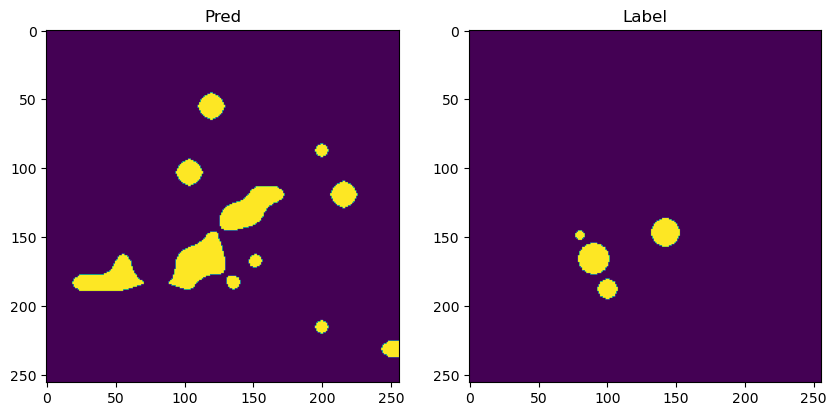

In [6]:
predict_random_img(model=model, data_dir=test_dir, label_dir=test_label)

In [1]:
import torch

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
indices = [[torch.tensor([1]).to('cuda'), torch.tensor([0])]]
batch_idx = torch.cat([torch.full_like(src, i) for i, (src, _) in enumerate(indices)])
src_idx = torch.cat([src for (src, _) in indices])
batch_idx, src_idx

(tensor([0], device='cuda:0'), tensor([1], device='cuda:0'))

In [7]:
batch_idx = torch.cat([torch.full_like(tgt, i) for i, (_, tgt) in enumerate(indices)])
tgt_idx = torch.cat([tgt for (_, tgt) in indices])
batch_idx, tgt_idx

(tensor([0]), tensor([0]))

In [2]:
batch_idx = torch.tensor([0]).to('cuda')

In [3]:
batch_idx

tensor([0], device='cuda:0')

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import torch

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
masks = []
cls =0


In [41]:
masks = []
cls =0
example = "/home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/valid_label_aug/7_2_51_51_aug.png"
img = mpimg.imread(example)
img = torch.tensor(img)
print(img.shape)
masks.append(img == cls)
masks.append(img == 255)
masks = torch.stack(masks, dim=0)
masks

torch.Size([256, 256])


tensor([[[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

In [40]:
masks.shape

torch.Size([2, 256, 256])

(-0.5, 255.5, 255.5, -0.5)

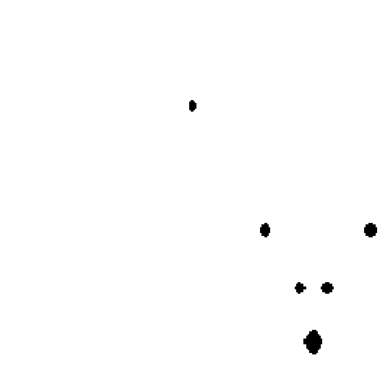

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])